<img src="IMG/logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales - Segundo Cuatrimestre 2025

# TS6: Respuesta en frecuencia de Filtros Pasivos RLC
#### Matías Cassino 

# Consignas
Considerando el circuito:

<img src="IMG/consigna_circuito_TS6.jpg"> 

1) Demostrar que la función de transferencia  $T(s)=\frac{V2(s)}{V1(s)}$
 se corresponde con una sección bicuadrática (SOS) $T(s)=k\frac{s^2+s\frac{ω_{0Z}}{Q_Z}+ω_{0Z}^2}{s^2+s\frac{ω_{0P}}{Q_P}+ω_{0P}^2}$

2) Parametrice los polinomios de segundo orden, hallando los parámetros $k$, $ω_{0Z}$, $Q_Z$, $ω_{0P}$, $Q_P$ en función de los elementos de la red.

3) Para cada función, utilice la red bicuadrática para implementarla:
- A: $T1(s)=\frac{s^2+9}{s^2+s√2+1}$
- B: $T2(s)=\frac{s^2+1/9}{s^2+s1/5+1}$
- C: $T3(s)=\frac{s^2+s1/5+1}{s^2+s√2+1}$

5) Dibuje el diagrama de polos y ceros de H(s). Indique la localización de polos y ceros en función de los parámetros.

6) Calcular y graficar la respuesta de módulo y fase, indicando la respuesta asintótica donde corresponda. 

Bonus:

1) ¿Cómo se podrían conectar en cascada $T_{1}(s)$
 y $T_{2}(s)$, y qué respuesta sería la resultante?

2) Simular las redes en LTspice


# Introducción


# Desarrollo experimental

In [1]:
#%% Módulos
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib import patches


#%% Funciones

plt.close('all')

def rta_frec(b,a,worN,label):
    w,h=signal.freqs(b,a,worN)
    
    # Gráfico de módulo
    plt.figure()
    plt.semilogx(w, 20*np.log10(abs(h)),label=label)
    plt.title('Respuesta en Magnitud')
    plt.xlabel('Pulsación angular [r/s]')
    plt.ylabel('|H(jω)| [dB]')
    plt.grid(True, which='both', ls=':')
    plt.legend()
    
    return w,h

def fase(w,h,label):
    phase=np.unwrap(np.angle(h))
    
    # Gráfico de fase
    plt.figure()
    # plt.semilogx(w, np.degrees(phase),label=f_aprox)
    plt.semilogx(w, phase,label=label)
    plt.title('Respuesta de fase')
    plt.xlabel('Pulsación angular [r/s]')
    plt.ylabel('Fase [rad]')
    plt.grid(True, which='both', ls=':')
    plt.legend()
    return phase

def polos_y_ceros(b,a,axis,label):
    z,p,k=signal.tf2zpk(b, a) 
    
    # Diagrama de polos y ceros
    plt.figure()
    plt.plot(np.real(p), np.imag(p), 'x', markersize=10, label=f'{label} Polos')
    axes_hdl = plt.gca()
    if len(z) > 0:
        plt.plot(np.real(z), np.imag(z), 'o', markersize=10, fillstyle='none', label=f'{label} Ceros')
        plt.axhline(0, color='k', lw=0.5)
        plt.axvline(0, color='k', lw=0.5)
        unit_circle = patches.Circle((0, 0), radius=1, fill=False,
                                   color='gray', ls='dotted', lw=2)
        axes_hdl.add_patch(unit_circle)
        axes_hdl.add_patch(unit_circle)
        plt.axis(axis)
        plt.title('Diagrama de Polos y Ceros (plano s)')
        plt.xlabel('σ [rad/s]')
        plt.ylabel('jω [rad/s]')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()    
    return z,p,k

#%% Función transferencia y parámetros
b1=[1,0,9]
a1=[1,np.sqrt(2),1]
worN1=np.logspace(-1,2,1000)
axis1=[-1.1, 1.1, -3.1, 3.1]


b2=[1,0,1/9]
a2=[1,1/5,1]
worN2=np.logspace(-1,2,1000)
axis2=[-1.1, 1.1, -1.1, 1.1]


b3=[1,1/5,1]
a3=[1,np.sqrt(2),1]
worN3=np.logspace(-1,2,1000)
axis3=[-1.1, 1.1, -1.1, 1.1]

# Producto en cascada: T_total(s) = T1(s)*T2(s)
b_total = np.polymul(b1, b2)
a_total = np.polymul(a1, a2)
worN_total = np.logspace(-1, 2, 1000)
axis_total=[-1.1, 1.1, -3.1, 3.1]

label=['T1(S)','T2(S)','T3(S)','T_total(S) = T1(S)*T2(S)']

# Análisis de resultados

1.

In [2]:
from IPython.display import IFrame
IFrame("IMG/Consigna_1_TS6.pdf", width=1000, height=1000)

2.

In [3]:
from IPython.display import IFrame
IFrame("IMG/Consigna_2_TS6.pdf", width=1000, height=1000)

3.

In [4]:
from IPython.display import IFrame
IFrame("IMG/Consigna_3_TS6.pdf", width=1000, height=1000)

4.

In [5]:
from IPython.display import IFrame
IFrame("IMG/Consigna_4_TS6.pdf", width=1000, height=1000)

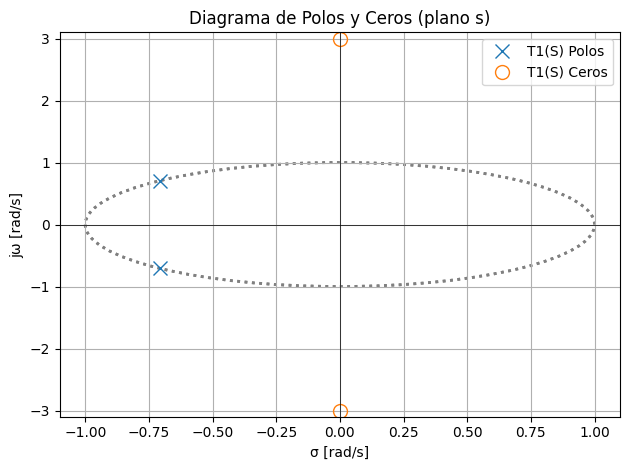

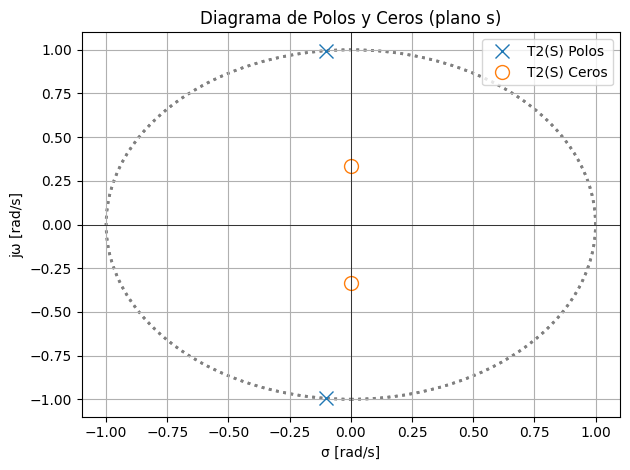

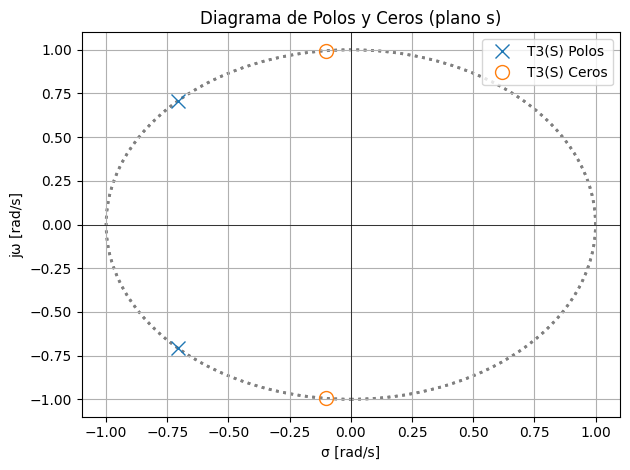

In [6]:
#%% Polos y ceros
z1,p1,k1=polos_y_ceros(b=b1,a=a1,axis=axis1,label=label[0])
z2,p2,k2=polos_y_ceros(b=b2,a=a2,axis=axis2,label=label[1])
z3,p3,k3=polos_y_ceros(b=b3,a=a3,axis=axis3,label=label[2])

5.

In [7]:
from IPython.display import IFrame
IFrame("IMG/Consigna_5_TS6.pdf", width=1000, height=1000)

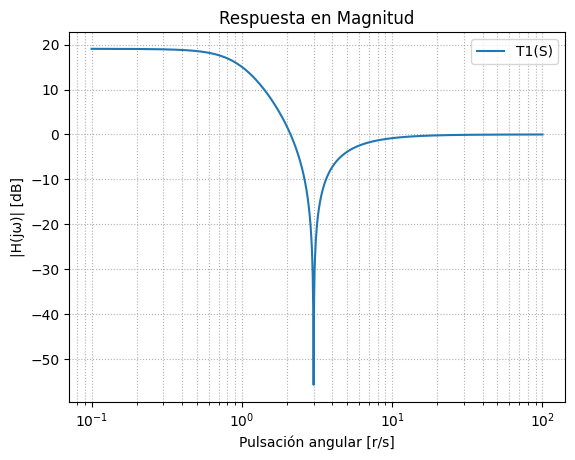

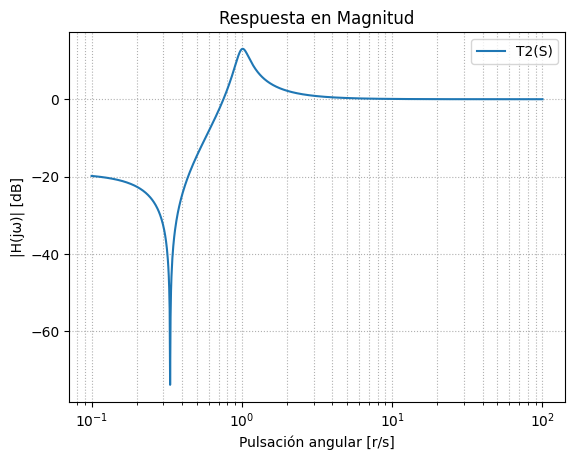

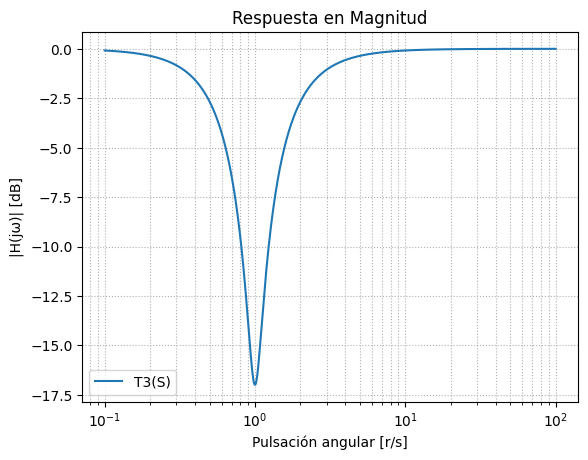

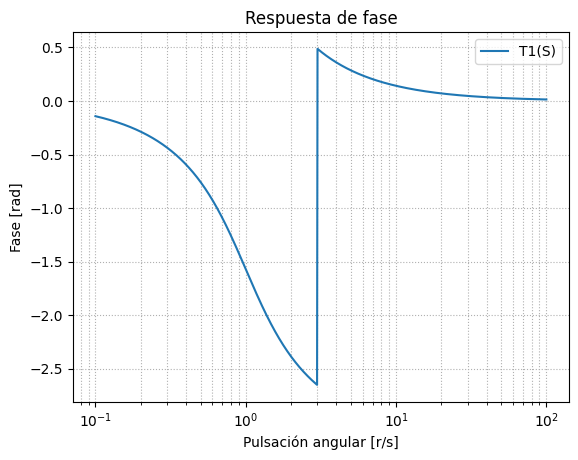

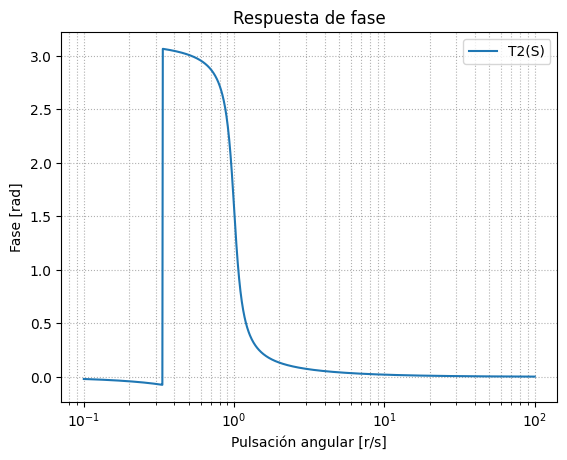

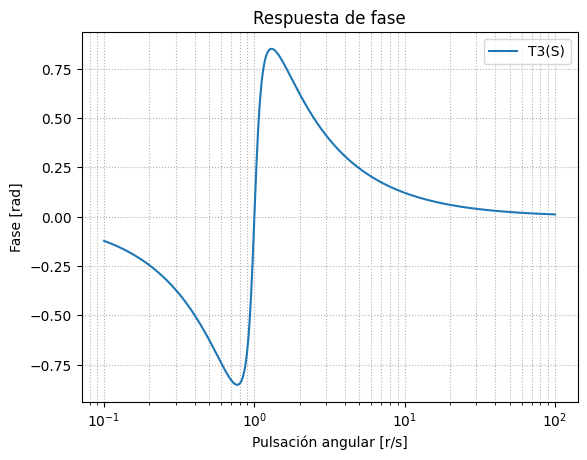

In [8]:
#%% RTA en frec
w1,h1=rta_frec(b=b1,a=a1,worN=worN1,label=label[0])
w2,h2=rta_frec(b=b2,a=a2,worN=worN2,label=label[1])
w3,h3=rta_frec(b=b3,a=a3,worN=worN3,label=label[2])

#%% RTA de fase
phase1=fase(w=w1,h=h1,label=label[0])
phase2=fase(w=w2,h=h2,label=label[1])
phase3=fase(w=w3,h=h3,label=label[2])

Bonus 1.

In [9]:
from IPython.display import IFrame
IFrame("IMG/Consigna_bonus1_TS6.pdf", width=1000, height=1000)

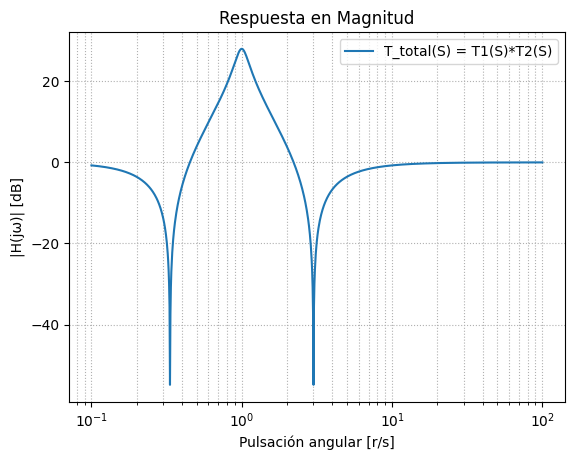

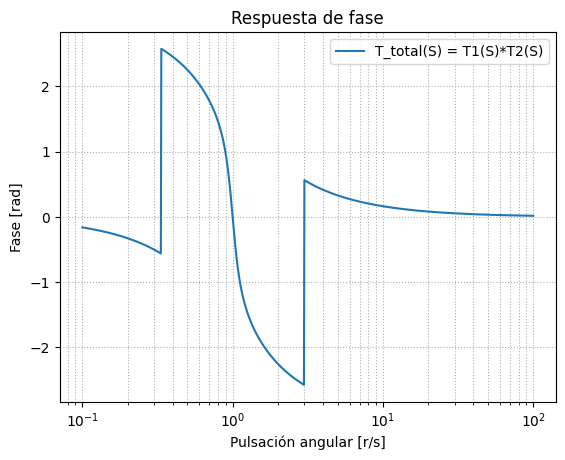

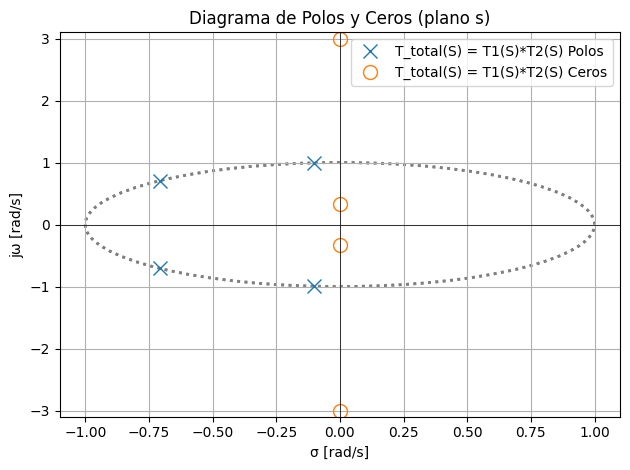

In [10]:
#%% Bonus 1
w_total, h_total = rta_frec(b_total, a_total, worN_total, label=label[3])
phase_total=fase(w=w_total,h=h_total,label=label[3])
z_total,p_total,k_total=polos_y_ceros(b=b_total,a=a_total,axis=axis_total,label=label[3])

Bonus 2.

In [11]:
from IPython.display import IFrame
IFrame("IMG/Consigna_bonus2_TS6.pdf", width=1000, height=1000)

# Conclusiones


# Autoevaluación
A) Sí, resolví la tarea con seguridad.

B) Lo aprendido en esta tarea fueron +++.

C) No fue utilizada ninguna IA.